In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar100.load_data()

print('Training data shape : ', train_x.shape, train_y.shape)
print('Testing data shape : ', test_x.shape, test_y.shape)

169001437/169001437 [==============================] - 102s 1us/step
Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [4]:
# Find the unique numbers from the train labels
classes = np.unique(train_y)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  100
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


(-0.5, 31.5, 31.5, -0.5)

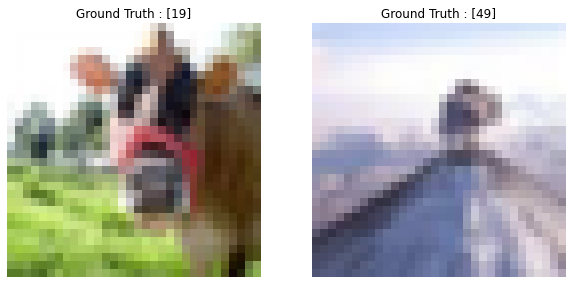

In [5]:
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='copper')
plt.title("Ground Truth : {}".format(train_y[0]))
plt.axis("off")

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='copper')
plt.title("Ground Truth : {}".format(test_y[0]))
plt.axis("off")
